In [146]:
# ingest data

In [147]:
import pandas as pd

In [148]:
data = pd.read_csv(r"C:\\FSDS\\ML\\Restaurant_Rating_Prediction\\notebooks\data\\EDA.csv")

EDA

In [149]:
data.head()


,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_two_people,type
0,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [150]:
data.sample(5)

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_two_people,type
40130,No,No,4.100000,1187,Malleshwaram,Casual Dining,"European, French, Salad",416.630112,Dine-out
4216,Yes,No,3.600000,30,Bellandur,Quick Bites,"Chinese, Biryani",250.000000,Delivery
47831,No,No,3.700449,0,City Market,"Takeaway, Delivery","Rolls, Fast Food, Beverages, Desserts",150.000000,Delivery
1337,Yes,No,3.300000,7,Bannerghatta Road,Sweet Shop,"Mithai, Desserts, Fast Food",300.000000,Delivery
50943,No,No,4.100000,42,Whitefield,Bakery,"Bakery, Desserts",400.000000,Desserts


In [151]:
data.isnull().sum()

online_order           0
book_table             0
rate                   0
votes                  0
location               0
rest_type              0
cuisines               0
cost_for_two_people    0
type                   0
dtype: int64

we dont have missing values in data.

In [152]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   online_order         51717 non-null  object 
 1   book_table           51717 non-null  object 
 2   rate                 51717 non-null  float64
 3   votes                51717 non-null  int64  
 4   location             51717 non-null  object 
 5   rest_type            51717 non-null  object 
 6   cuisines             51717 non-null  object 
 7   cost_for_two_people  51717 non-null  float64
 8   type                 51717 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 3.6+ MB


In [153]:
data.head()

,online_order,book_table,rate,votes,location,rest_type,cuisines,cost_for_two_people,type
0,Yes,Yes,4.1,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800.0,Buffet
1,Yes,No,4.1,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800.0,Buffet
2,Yes,No,3.8,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800.0,Buffet
3,No,No,3.7,88,Banashankari,Quick Bites,"South Indian, North Indian",300.0,Buffet
4,No,No,3.8,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600.0,Buffet


In [154]:
data.duplicated()

0        False
1        False
2        False
3        False
4        False
         ...  
51712    False
51713    False
51714    False
51715    False
51716    False
Length: 51717, dtype: bool

In [155]:
data.duplicated().sum()

20086

In [156]:
data.shape

(51717, 9)

In [157]:
# Creating a csv file for further process
#df.to_csv("EDA_FE.csv",index=False)

In [158]:
#Categorical Vs Numerical Columns

In [159]:
categorical_columns=data.columns[data.dtypes=="object"]     #categorical columns

In [160]:
numerical_columns=data.columns[data.dtypes!="object"]    #numerical columns

In [161]:
data[categorical_columns].describe()

,online_order,book_table,location,rest_type,cuisines,type
count,51717,51717,51717,51717,51717,51717
unique,2,2,94,94,2724,7
top,Yes,No,BTM,Quick Bites,North Indian,Delivery
freq,30444,45268,5124,19132,2913,25942


In [162]:
data[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
rate,51717.0,3.700449,0.395391,1.8,3.5,3.700449,3.9,4.9
votes,51717.0,283.697527,803.838853,0.0,7.0,41.000000,198.0,16832.0
cost_for_two_people,51717.0,416.630112,180.431824,40.0,300.0,400.000000,500.0,950.0


In [163]:
data[categorical_columns]['online_order'].value_counts()

online_order
Yes    30444
No     21273
Name: count, dtype: int64

In [164]:
data[categorical_columns]['book_table'].value_counts()

book_table
No     45268
Yes     6449
Name: count, dtype: int64

In [165]:
data[categorical_columns]['type'].value_counts()

type
Delivery              25942
Dine-out              17779
Desserts               3593
Cafes                  1723
Drinks & nightlife     1101
Buffet                  882
Pubs and bars           697
Name: count, dtype: int64

In [166]:
data[numerical_columns].describe().T

,count,mean,std,min,25%,50%,75%,max
rate,51717.0,3.700449,0.395391,1.8,3.5,3.700449,3.9,4.9
votes,51717.0,283.697527,803.838853,0.0,7.0,41.000000,198.0,16832.0
cost_for_two_people,51717.0,416.630112,180.431824,40.0,300.0,400.000000,500.0,950.0


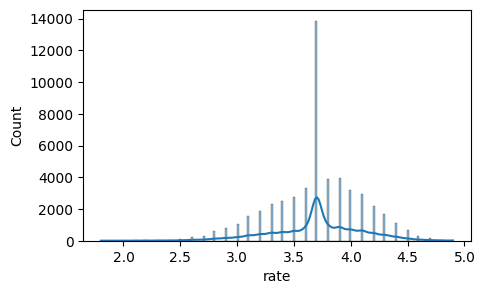

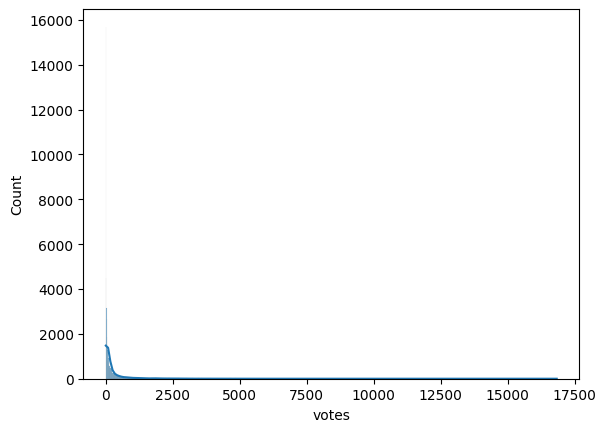

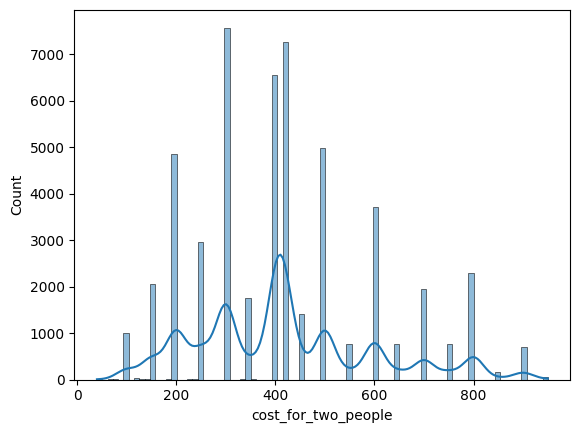

In [167]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))


for col in numerical_columns:
    sns.histplot(data=data,x=col,kde=True)
    print("\n")
    plt.show()

In [168]:
# categorical data

<Axes: >

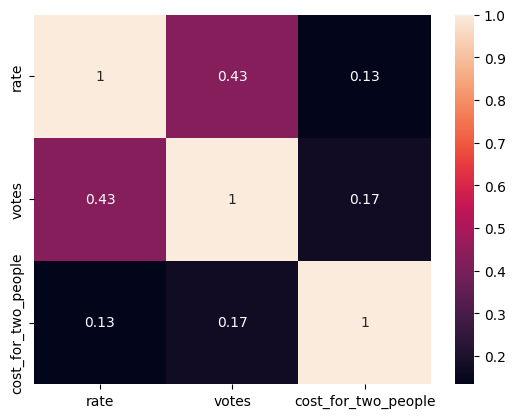

In [169]:
sns.heatmap(data[numerical_columns].corr(),annot=True)

In [170]:
# Feature Engineering

In [171]:

data.columns

Index(['online_order', 'book_table', 'rate', 'votes', 'location', 'rest_type',
       'cuisines', 'cost_for_two_people', 'type'],
      dtype='object')

In [172]:
data['online_order'].unique()

array(['Yes', 'No'], dtype=object)

In [173]:
data['book_table'].unique()

array(['Yes', 'No'], dtype=object)

In [174]:
data['type'].unique()

array(['Buffet', 'Cafes', 'Delivery', 'Desserts', 'Dine-out',
       'Drinks & nightlife', 'Pubs and bars'], dtype=object)

threshold for categorical values

In [175]:
import numpy as np

def handle_categorical_columns(data, column_thresholds):  
    for column_name, threshold in column_thresholds.items():
        column_count = data[column_name].value_counts()
        categories_below_threshold = column_count[column_count < threshold].index
        data[column_name] = np.where(data[column_name].isin(categories_below_threshold), 'others', data[column_name])
        print(f"Updated column '{column_name}' with threshold {threshold}")

In [176]:
# Handle categorical columns
column_thresholds = {"rest_type": 1000, "cuisines": 300, "location": 500}
handle_categorical_columns(data, column_thresholds)

Updated column 'rest_type' with threshold 1000
Updated column 'cuisines' with threshold 300
Updated column 'location' with threshold 500


In [177]:
data.to_csv("final_data.csv",index=False)